## Linear Regression with Scikit-Learn in Python

In this notebook, we will employ a linear regression model  to predict continuous value outputs of residents water units outputs in $\mathrm{m^3}$ using Scikit-Learn, which is one of the most popular machine learning libraries for Python.

### Imports 
Lets import our libraries that we are going to use in our project

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as seabornInstance


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# allow plots to appear directly in the notebook
%matplotlib inline

In [2]:
# Lets load our data 
df = pd.read_csv('data.csv')

In [3]:
# Lets see how our data is like 
df.head()

,RESERVOIR_WATER,RESIDENT_UNITS
0,6887,9128.5
1,11370,9129.0
2,12080,12080.0
3,12245,12245.0
4,15096,15096.0


In [4]:
# Lets see the statistical details of our data using the describe function
print('VALUES ', df.describe())
# Lets see how many rows and columns are in our dataset
print('Columns and Rows', df.shape)

VALUES         RESERVOIR_WATER  RESIDENT_UNITS 
count        28.000000        28.000000
mean      13885.428571     13231.375000
std        1964.235718      2274.304609
min        6887.000000      9128.500000
25%       13070.250000     12148.750000
50%       14325.500000     12784.500000
75%       14941.000000     15274.750000
max       17684.000000     16785.000000
Columns and Rows (28, 2)


Lets add some of the features by adding calculating the difference and percetage of the units of water in the reservoir to unit recodings of resident units

In [5]:
# difference between the reserve_water and residents_units
df['DIFFERENCE'] = df['RESERVOIR_WATER']-df['RESIDENT_UNITS ']
# percentage of the used resident units over the reserver water
df['Perc (%)'] = (df['RESIDENT_UNITS ']/df['RESERVOIR_WATER']) * 100
# Lets view the first 1o rows in our data
df.head(10)

,RESERVOIR_WATER,RESIDENT_UNITS,DIFFERENCE,Perc (%)
0,6887,9128.5,-2241.5,132.546827
1,11370,9129.0,2241.0,80.290237
2,12080,12080.0,0.0,100.000000
3,12245,12245.0,0.0,100.000000
4,15096,15096.0,0.0,100.000000
5,13713,13713.0,0.0,100.000000
6,13563,12161.0,1402.0,89.663054
7,12491,12161.0,330.0,97.358098
8,13185,13000.0,185.0,98.596890
9,11992,12478.0,-486.0,104.052702


### Data Visualization

Lets use  `matplotlib` package to visualize our data by plotting  the data as a scatter plot by selecting the *RESERVOIR_WATER* to be our independed value and *RESIDENT_UNITS* to be our dependent value

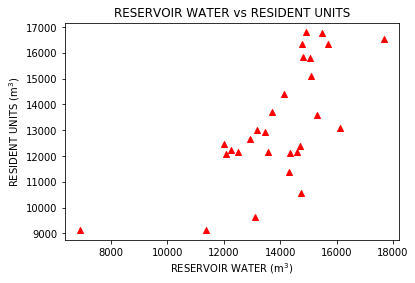

In [6]:
plt.title('RESERVOIR WATER vs RESIDENT UNITS')
plt.xlabel('RESERVOIR WATER ($\mathrm{m^3}$)')
plt.ylabel('RESIDENT UNITS ($\mathrm{m^3}$)')
plt.scatter(df['RESERVOIR_WATER'],df['RESIDENT_UNITS '], color='r', marker='^')

This is how our plot is comming out -  a very beatiful plot :-)

### Machine Learning - Linear Regression
Lets dig into the intresting stuff, aint you excited? cause the long wait is over.

We will use `Linear Regression` to build our model which is used to predict continuous value outputs. 

In [7]:
# assign our data as attributes (independent) and labels (dependent), labels are whose values to be predicted
X = df['RESERVOIR_WATER'].values.reshape(-1,1)
y = df['RESIDENT_UNITS '].values.reshape(-1,1) # -1 means that calculate the dimension of rows, but have 1 column

# split the test data into 20% then 80% into training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# create linear regression
regressor =  LinearRegression()
# fit model to training data
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#To retrieve the intercept:
print('Intercept:', regressor.intercept_)

#For retrieving the slope:
print('Slope:' ,regressor.coef_)

Intercept: [2110.50252997]
Slope: [[0.80402594]]


The intercept is the value of Y (RESIDENT UNITS) when  X=0 (RESERVOIR WATER). Slope is the change in Y divided by change in X.  In our case the intercept is `2917.68614757` and slope is `0.80402594`. 

What it means is;
1. a  "unit" increase in the resevoir water capacity is associated with `0.80402594` increase of residents consumptions
2. Or more clearly. An additional increase of 100 m^3 in the  water resevoir is associated with an increase of `80.402594` water units of residents. 

Lets make some predictions with our data from our trained model by predicting the values of `y` given the new test X `(X_test)` data

In [10]:
y_pred = regressor.predict(X_test)

In [11]:
# Lets compare the actual and predicted data from our model
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,12080.0,11823.135857
1,12375.0,13937.724074
2,15811.0,14229.585489
3,11396.0,13612.897595
4,13713.0,13136.110214
5,12659.0,12508.969982


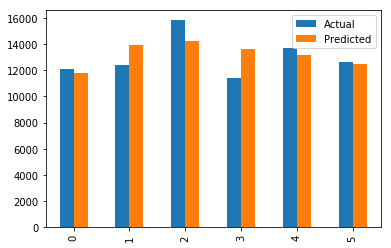

In [12]:
# Lets visualize our actual data over predicted data for the randomly five chosen data used in our model
df.plot(kind='bar')


Here we are comparing the actual values to the predicted values and somehow our model isn't really doing well but its close with a marging in  a range of `50 values`.

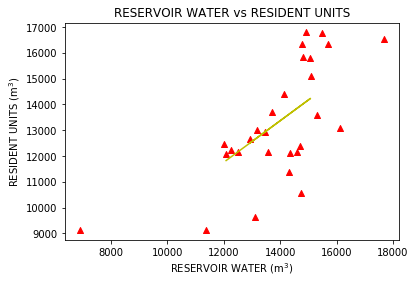

In [13]:
plt.title('RESERVOIR WATER vs RESIDENT UNITS')
plt.xlabel('RESERVOIR WATER ($\mathrm{m^3}$)')
plt.ylabel('RESIDENT UNITS ($\mathrm{m^3}$)')
plt.scatter(X, y, color='r', marker='^')
plt.plot(X_test, y_pred, color='y')

The straight line shown in our plot confirms that our algorithm is in the right path.

Finally lets evaluate the a performance of our model, for linear regression there are three primart metrics used namely:
    

1. Mean Absolute Error (MAE) - reprents average error
2. Mean Squared Error (MSE) - similar to MAE but noise is exaggerated and "punishes" large errors.
3. Root Mean Squared Error (RMSE) - similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units.

In [14]:
# print result for MAE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

# print results for MSE
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

# print results for RMSE
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 1057.470020992794
MSE: 1713150.5584961798
RMSE: 1308.873774852327
